In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from random import uniform
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets,models,layers

In [ ]:
catagories =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
directory_train='Hand_Sign/Train'
train = []

for catagory in catagories:
    path = os.path.join(directory_train, catagory)
    class_num = catagories.index(catagory)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        train.append([img_array, class_num])

In [ ]:
random.shuffle(train)

train_imgs=[]
train_labels=[]

for tr in train:
    train_imgs.append(tr[0])
    
for tr in train:
    train_labels.append(tr[1])
    
# print('train_imgs=',len(train_imgs))
# print('train_labels=',len(train_labels))

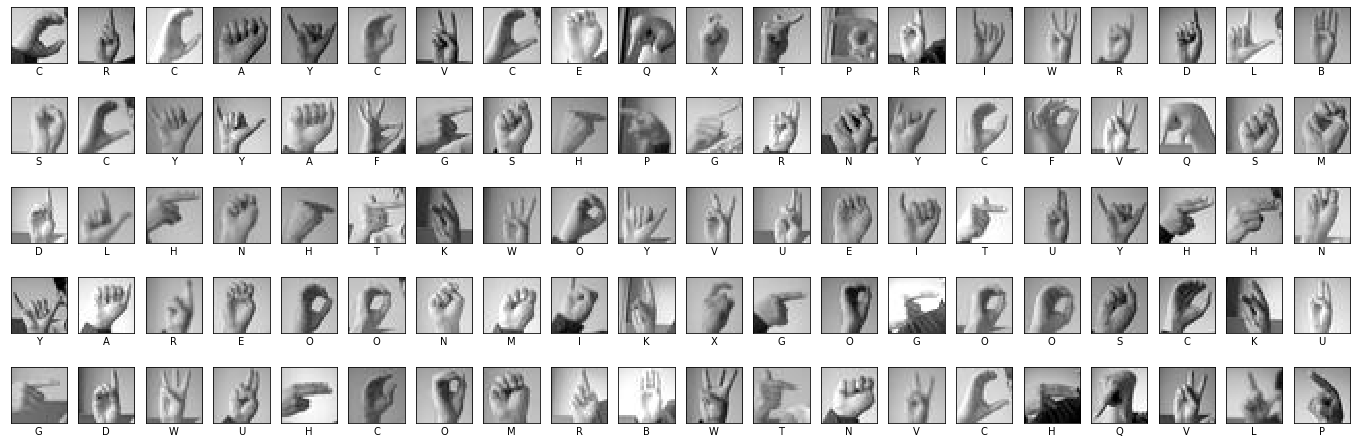

In [ ]:
plt.figure(figsize=(24,8))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(train_imgs[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(catagories[train_labels[i]])
    
plt.show()

In [ ]:
directory_test='Hand_Sign/Test'
test = []

for catagory in catagories:
    path = os.path.join(directory_test, catagory)
    class_num = catagories.index(catagory)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        test.append([img_array, class_num])

In [ ]:
random.shuffle(test)

test_imgs=[]
test_labels=[]

for tr in test:
    test_imgs.append(tr[0])
    
for tr in test:
    test_labels.append(tr[1])
    
# print('test_imgs=',len(test_imgs))
# print('test_labels=',len(test_labels))

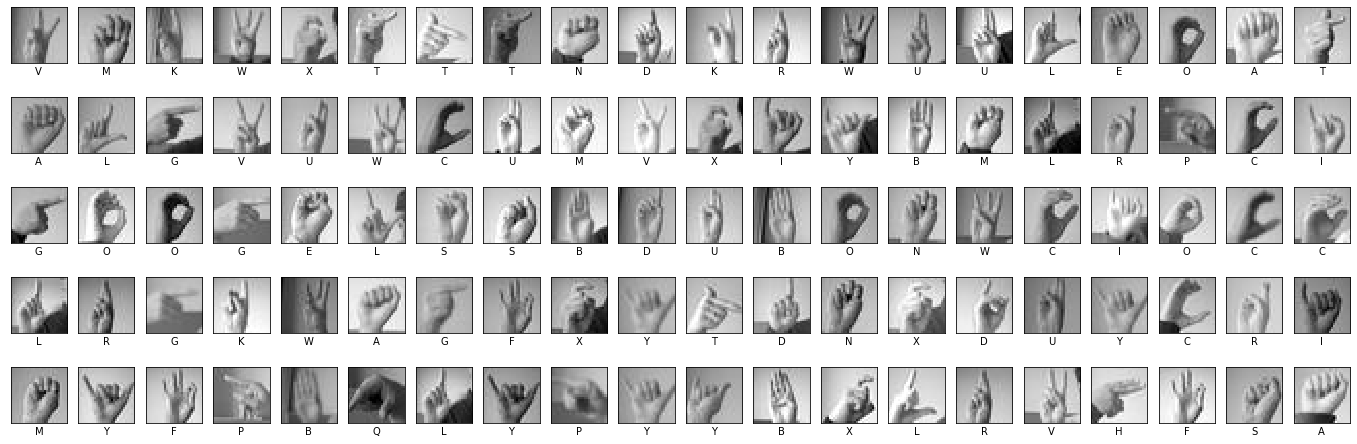

In [ ]:
plt.figure(figsize=(24,8))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(test_imgs[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(catagories[test_labels[i]])
    
plt.show()

In [ ]:
train_imgs = np.array(train_imgs)
train_labels = np.array(train_labels)

test_imgs = np.array(test_imgs)
test_labels = np.array(test_labels)

In [ ]:
# Main parts
nn = [16,32,64]
fs = [(3,3),(5,5)]    
ps = [(2,2),(3,3)]         
conv_layers = [2,3,4]
dense_layers = [1,3] 
MODEL=0;

for n in nn:
  for f in fs:
    for p in ps:
      for c in conv_layers:
        for d in dense_layers:

          NAME = "{}-conv-{}-neuron-{}-dense-{}-filtersize-{}-pool-size".format(c,n,d,f,p)
          model=models.Sequential()
          # fixed 16 nuron for all initial convo layer
          model.add(layers.Conv2D(16,f,kernel_initializer='he_uniform',padding='same',input_shape=train_imgs[0].shape  ))
          model.add(layers.Activation('relu'))
          model.add(layers.MaxPooling2D(p,strides=1  ) )
          model.add(layers.Dropout(0.2))

          for i in range(c-1):
            model.add(layers.Conv2D(n,f,kernel_initializer='he_uniform',padding='same' ))
            model.add(layers.Activation('relu'))
          
          model.add(layers.BatchNormalization())
          model.add(layers.MaxPooling2D(p,strides=2  ) )
          model.add(layers.Dropout( 0.2 ))
          model.add(layers.Flatten())

          for j in range(d-1):
            model.add(layers.Dense(n))
            model.add(layers.Activation('relu'))
          
          model.add(layers.Dense(24))
          model.add(layers.Activation('softmax'))
         # model.summary()
          tf_callback= tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME))
          opt=tf.keras.optimizers.SGD(lr=0.001,momentum=0.9)
          model.compile(
            
            optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
            metrics=['accuracy']


          )
          MODEL=MODEL+1
          print("----------------------------- Model no = %s  -------------------------------- " % (MODEL))
          print("Nuron =%s   Filter size=%s   Pulling=%s  Convo layer=%s  Dense layer=%s" % (n, f, p, c, d))
          print("------------------------------------------------------------------------------ ") 
          h=model.fit(train_imgs,train_labels,epochs=10,validation_split=0.2,callbacks=[tf_callback])
          print("----------------------------------  test for model no = %s------------------------------------------- " % (MODEL)) 
          test_loss,test_acc=model.evaluate(test_imgs,test_labels)
          print(test_loss,test_acc)
          print("------------------------------------------------------------------------------ ") 

----------------------------- Model no = 1  -------------------------------- 
Nuron =16   Filter size=(3, 3)   Pulling=(2, 2)  Convo layer=2  Dense layer=1
------------------------------------------------------------------------------ 
Epoch 1/10
123/123 [==============================] - 7s 52ms/step - loss: 3.7908 - accuracy: 0.1847 - val_loss: 1.2804 - val_accuracy: 0.6179
Epoch 2/10
123/123 [==============================] - 6s 46ms/step - loss: 1.0973 - accuracy: 0.6601 - val_loss: 0.6632 - val_accuracy: 0.8140
Epoch 3/10
123/123 [==============================] - 6s 46ms/step - loss: 0.4890 - accuracy: 0.8475 - val_loss: 0.3482 - val_accuracy: 0.9096
Epoch 4/10
123/123 [==============================] - 6s 45ms/step - loss: 0.2825 - accuracy: 0.9062 - val_loss: 0.2625 - val_accuracy: 0.9350
Epoch 5/10
123/123 [==============================] - 5s 45ms/step - loss: 0.1934 - accuracy: 0.9429 - val_loss: 0.1707 - val_accuracy: 0.9522
Epoch 6/10
123/123 [=============================

123/123 [==============================] - 9s 73ms/step - loss: 2.9679 - accuracy: 0.2111 - val_loss: 1.5336 - val_accuracy: 0.5640
Epoch 2/10
123/123 [==============================] - 8s 63ms/step - loss: 1.1679 - accuracy: 0.6463 - val_loss: 1.0171 - val_accuracy: 0.6667
Epoch 3/10
123/123 [==============================] - 7s 61ms/step - loss: 0.5007 - accuracy: 0.8342 - val_loss: 0.4310 - val_accuracy: 0.8902
Epoch 4/10
123/123 [==============================] - 7s 60ms/step - loss: 0.2333 - accuracy: 0.9286 - val_loss: 0.2124 - val_accuracy: 0.9461
Epoch 5/10
123/123 [==============================] - 7s 61ms/step - loss: 0.1401 - accuracy: 0.9578 - val_loss: 0.1063 - val_accuracy: 0.9837
Epoch 6/10
123/123 [==============================] - 8s 65ms/step - loss: 0.0908 - accuracy: 0.9708 - val_loss: 0.1114 - val_accuracy: 0.9726
Epoch 7/10
123/123 [==============================] - 8s 62ms/step - loss: 0.0595 - accuracy: 0.9839 - val_loss: 0.0771 - val_accuracy: 0.9878
Epoch 8/10

123/123 [==============================] - 6s 48ms/step - loss: 1.7668 - accuracy: 0.4744 - val_loss: 1.5995 - val_accuracy: 0.4878
Epoch 3/10
123/123 [==============================] - 6s 50ms/step - loss: 0.7923 - accuracy: 0.7441 - val_loss: 1.2569 - val_accuracy: 0.6362
Epoch 4/10
123/123 [==============================] - 6s 47ms/step - loss: 0.4467 - accuracy: 0.8592 - val_loss: 0.5128 - val_accuracy: 0.8516
Epoch 5/10
123/123 [==============================] - 6s 52ms/step - loss: 0.2801 - accuracy: 0.9170 - val_loss: 0.2612 - val_accuracy: 0.9268
Epoch 6/10
123/123 [==============================] - 6s 48ms/step - loss: 0.1994 - accuracy: 0.9407 - val_loss: 0.2038 - val_accuracy: 0.9411
Epoch 7/10
123/123 [==============================] - 6s 48ms/step - loss: 0.1516 - accuracy: 0.9547 - val_loss: 0.1705 - val_accuracy: 0.9533
Epoch 8/10
123/123 [==============================] - 6s 47ms/step - loss: 0.1057 - accuracy: 0.9732 - val_loss: 0.0920 - val_accuracy: 0.9787
Epoch 9/10

123/123 [==============================] - 7s 60ms/step - loss: 0.2200 - accuracy: 0.9312 - val_loss: 0.1747 - val_accuracy: 0.9553
Epoch 5/10
123/123 [==============================] - 8s 64ms/step - loss: 0.1405 - accuracy: 0.9565 - val_loss: 0.1254 - val_accuracy: 0.9654
Epoch 6/10
123/123 [==============================] - 7s 59ms/step - loss: 0.0875 - accuracy: 0.9743 - val_loss: 0.1853 - val_accuracy: 0.9461
Epoch 7/10
123/123 [==============================] - 8s 62ms/step - loss: 0.0589 - accuracy: 0.9831 - val_loss: 0.0796 - val_accuracy: 0.9797
Epoch 8/10
123/123 [==============================] - 7s 57ms/step - loss: 0.0425 - accuracy: 0.9900 - val_loss: 0.0766 - val_accuracy: 0.9797
Epoch 9/10
123/123 [==============================] - 8s 64ms/step - loss: 0.0296 - accuracy: 0.9945 - val_loss: 0.0616 - val_accuracy: 0.9848
Epoch 10/10
123/123 [==============================] - 7s 59ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0613 - val_accuracy: 0.9848
---------

Epoch 6/10
123/123 [==============================] - 15s 119ms/step - loss: 0.0877 - accuracy: 0.9727 - val_loss: 0.0651 - val_accuracy: 0.9878
Epoch 7/10
123/123 [==============================] - 15s 121ms/step - loss: 0.0433 - accuracy: 0.9884 - val_loss: 0.0706 - val_accuracy: 0.9858
Epoch 8/10
123/123 [==============================] - 15s 122ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.0414 - val_accuracy: 0.9939
Epoch 9/10
123/123 [==============================] - 15s 126ms/step - loss: 0.0456 - accuracy: 0.9879 - val_loss: 0.0742 - val_accuracy: 0.9797
Epoch 10/10
123/123 [==============================] - 15s 120ms/step - loss: 0.0275 - accuracy: 0.9935 - val_loss: 0.0549 - val_accuracy: 0.9858
----------------------------------  test for model no = 17------------------------------------------- 
113/113 [==============================] - 2s 14ms/step - loss: 0.4393 - accuracy: 0.8829
0.439281702041626 0.8828603029251099
--------------------------------------------

Epoch 8/10
123/123 [==============================] - 11s 87ms/step - loss: 0.0747 - accuracy: 0.9740 - val_loss: 0.0757 - val_accuracy: 0.9756
Epoch 9/10
123/123 [==============================] - 11s 92ms/step - loss: 0.0396 - accuracy: 0.9908 - val_loss: 0.0787 - val_accuracy: 0.9787
Epoch 10/10
123/123 [==============================] - 11s 86ms/step - loss: 0.0422 - accuracy: 0.9891 - val_loss: 0.0337 - val_accuracy: 0.9888
----------------------------------  test for model no = 21------------------------------------------- 
113/113 [==============================] - 1s 11ms/step - loss: 0.2554 - accuracy: 0.9385
0.25535038113594055 0.9385086297988892
------------------------------------------------------------------------------ 
----------------------------- Model no = 22  -------------------------------- 
Nuron =16   Filter size=(5, 5)   Pulling=(3, 3)  Convo layer=3  Dense layer=3
------------------------------------------------------------------------------ 
Epoch 1/10
123/123

123/123 [==============================] - 6s 46ms/step - loss: 0.0217 - accuracy: 0.9963 - val_loss: 0.1050 - val_accuracy: 0.9726
Epoch 10/10
123/123 [==============================] - 6s 45ms/step - loss: 0.0254 - accuracy: 0.9935 - val_loss: 0.0615 - val_accuracy: 0.9837
----------------------------------  test for model no = 25------------------------------------------- 
113/113 [==============================] - 1s 8ms/step - loss: 0.5792 - accuracy: 0.8484
0.5791845917701721 0.8483583927154541
------------------------------------------------------------------------------ 
----------------------------- Model no = 26  -------------------------------- 
Nuron =32   Filter size=(3, 3)   Pulling=(2, 2)  Convo layer=2  Dense layer=3
------------------------------------------------------------------------------ 
Epoch 1/10
123/123 [==============================] - 9s 70ms/step - loss: 3.2370 - accuracy: 0.0672 - val_loss: 2.6571 - val_accuracy: 0.2114
Epoch 2/10
123/123 [==============

123/123 [==============================] - 14s 112ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0862 - val_accuracy: 0.9756
----------------------------------  test for model no = 29------------------------------------------- 
113/113 [==============================] - 2s 15ms/step - loss: 0.4929 - accuracy: 0.8753
0.49287402629852295 0.8753477931022644
------------------------------------------------------------------------------ 
----------------------------- Model no = 30  -------------------------------- 
Nuron =32   Filter size=(3, 3)   Pulling=(2, 2)  Convo layer=4  Dense layer=3
------------------------------------------------------------------------------ 
Epoch 1/10
123/123 [==============================] - 15s 116ms/step - loss: 3.2315 - accuracy: 0.0605 - val_loss: 2.9092 - val_accuracy: 0.0904
Epoch 2/10
123/123 [==============================] - 13s 103ms/step - loss: 2.7185 - accuracy: 0.1792 - val_loss: 2.4356 - val_accuracy: 0.2724
Epoch 3/10
123/123 [=======

113/113 [==============================] - 1s 12ms/step - loss: 0.4225 - accuracy: 0.8856
0.4224640130996704 0.8856427669525146
------------------------------------------------------------------------------ 
----------------------------- Model no = 34  -------------------------------- 
Nuron =32   Filter size=(3, 3)   Pulling=(3, 3)  Convo layer=3  Dense layer=3
------------------------------------------------------------------------------ 
Epoch 1/10
123/123 [==============================] - 12s 91ms/step - loss: 3.2124 - accuracy: 0.0755 - val_loss: 2.9318 - val_accuracy: 0.1128
Epoch 2/10
123/123 [==============================] - 9s 72ms/step - loss: 2.6678 - accuracy: 0.1538 - val_loss: 2.2074 - val_accuracy: 0.2978
Epoch 3/10
123/123 [==============================] - 9s 77ms/step - loss: 1.6371 - accuracy: 0.4322 - val_loss: 1.3856 - val_accuracy: 0.5681
Epoch 4/10
123/123 [==============================] - 10s 78ms/step - loss: 0.8245 - accuracy: 0.7109 - val_loss: 0.6856 - va

Epoch 1/10
123/123 [==============================] - 11s 84ms/step - loss: 3.1955 - accuracy: 0.0646 - val_loss: 2.8073 - val_accuracy: 0.1484
Epoch 2/10
123/123 [==============================] - 9s 71ms/step - loss: 2.5722 - accuracy: 0.1994 - val_loss: 3.0101 - val_accuracy: 0.2825
Epoch 3/10
123/123 [==============================] - 10s 81ms/step - loss: 1.3801 - accuracy: 0.5409 - val_loss: 2.1922 - val_accuracy: 0.4238
Epoch 4/10
123/123 [==============================] - 9s 71ms/step - loss: 0.7094 - accuracy: 0.7533 - val_loss: 0.7611 - val_accuracy: 0.7327
Epoch 5/10
123/123 [==============================] - 9s 71ms/step - loss: 0.4312 - accuracy: 0.8535 - val_loss: 0.3733 - val_accuracy: 0.8801
Epoch 6/10
123/123 [==============================] - 8s 69ms/step - loss: 0.2263 - accuracy: 0.9256 - val_loss: 0.2907 - val_accuracy: 0.9157
Epoch 7/10
123/123 [==============================] - 10s 78ms/step - loss: 0.1685 - accuracy: 0.9441 - val_loss: 0.1386 - val_accuracy: 0.9

123/123 [==============================] - 21s 172ms/step - loss: 1.9414 - accuracy: 0.3899 - val_loss: 1.5019 - val_accuracy: 0.5346
Epoch 3/10
123/123 [==============================] - 21s 169ms/step - loss: 0.7908 - accuracy: 0.7353 - val_loss: 2.1162 - val_accuracy: 0.5630
Epoch 4/10
123/123 [==============================] - 22s 176ms/step - loss: 0.3054 - accuracy: 0.8967 - val_loss: 0.2648 - val_accuracy: 0.9228
Epoch 5/10
123/123 [==============================] - 22s 175ms/step - loss: 0.1570 - accuracy: 0.9547 - val_loss: 0.2678 - val_accuracy: 0.9309
Epoch 6/10
123/123 [==============================] - 22s 176ms/step - loss: 0.1037 - accuracy: 0.9706 - val_loss: 0.1250 - val_accuracy: 0.9665
Epoch 7/10
123/123 [==============================] - 21s 174ms/step - loss: 0.0483 - accuracy: 0.9887 - val_loss: 0.2141 - val_accuracy: 0.9380
Epoch 8/10
123/123 [==============================] - 20s 164ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.0852 - val_accuracy: 0.9

123/123 [==============================] - 15s 126ms/step - loss: 2.4217 - accuracy: 0.2113 - val_loss: 4.3143 - val_accuracy: 0.1941
Epoch 4/10
123/123 [==============================] - 14s 117ms/step - loss: 1.1028 - accuracy: 0.6213 - val_loss: 1.4318 - val_accuracy: 0.5650
Epoch 5/10
123/123 [==============================] - 15s 120ms/step - loss: 0.5705 - accuracy: 0.8059 - val_loss: 0.9388 - val_accuracy: 0.7114
Epoch 6/10
123/123 [==============================] - 14s 112ms/step - loss: 0.2954 - accuracy: 0.9018 - val_loss: 0.3306 - val_accuracy: 0.8862
Epoch 7/10
123/123 [==============================] - 14s 113ms/step - loss: 0.1904 - accuracy: 0.9345 - val_loss: 0.2154 - val_accuracy: 0.9380
Epoch 8/10
123/123 [==============================] - 15s 119ms/step - loss: 0.1213 - accuracy: 0.9610 - val_loss: 0.1307 - val_accuracy: 0.9634
Epoch 9/10
123/123 [==============================] - 14s 110ms/step - loss: 0.0815 - accuracy: 0.9730 - val_loss: 0.0983 - val_accuracy: 0.9

123/123 [==============================] - 9s 71ms/step - loss: 0.2616 - accuracy: 0.9152 - val_loss: 1.0727 - val_accuracy: 0.7500
Epoch 5/10
123/123 [==============================] - 9s 74ms/step - loss: 0.1691 - accuracy: 0.9383 - val_loss: 0.3610 - val_accuracy: 0.8882
Epoch 6/10
123/123 [==============================] - 8s 65ms/step - loss: 0.0664 - accuracy: 0.9814 - val_loss: 0.1361 - val_accuracy: 0.9512
Epoch 7/10
123/123 [==============================] - 9s 74ms/step - loss: 0.0683 - accuracy: 0.9779 - val_loss: 0.1970 - val_accuracy: 0.9431
Epoch 8/10
123/123 [==============================] - 8s 64ms/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.2686 - val_accuracy: 0.9167
Epoch 9/10
123/123 [==============================] - 9s 71ms/step - loss: 0.0227 - accuracy: 0.9945 - val_loss: 0.2182 - val_accuracy: 0.9228
Epoch 10/10
123/123 [==============================] - 10s 83ms/step - loss: 0.0225 - accuracy: 0.9939 - val_loss: 0.0894 - val_accuracy: 0.9756
--------

123/123 [==============================] - 25s 203ms/step - loss: 0.0933 - accuracy: 0.9729 - val_loss: 0.0680 - val_accuracy: 0.9858
Epoch 6/10
123/123 [==============================] - 26s 208ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0655 - val_accuracy: 0.9837
Epoch 7/10
123/123 [==============================] - 24s 193ms/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.0545 - val_accuracy: 0.9827
Epoch 8/10
123/123 [==============================] - 25s 201ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0614 - val_accuracy: 0.9898
Epoch 9/10
123/123 [==============================] - 25s 203ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0995 - val_accuracy: 0.9736
Epoch 10/10
123/123 [==============================] - 24s 195ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.1207 - val_accuracy: 0.9705
----------------------------------  test for model no = 54------------------------------------------- 
113/113 [============================

123/123 [==============================] - 17s 138ms/step - loss: 0.1860 - accuracy: 0.9413 - val_loss: 0.4985 - val_accuracy: 0.8709
Epoch 7/10
123/123 [==============================] - 17s 141ms/step - loss: 0.1521 - accuracy: 0.9513 - val_loss: 0.4046 - val_accuracy: 0.9014
Epoch 8/10
123/123 [==============================] - 16s 126ms/step - loss: 0.1023 - accuracy: 0.9682 - val_loss: 0.1820 - val_accuracy: 0.9431
Epoch 9/10
123/123 [==============================] - 16s 128ms/step - loss: 0.0601 - accuracy: 0.9801 - val_loss: 0.1662 - val_accuracy: 0.9350
Epoch 10/10
123/123 [==============================] - 15s 123ms/step - loss: 0.0646 - accuracy: 0.9773 - val_loss: 0.1939 - val_accuracy: 0.9593
----------------------------------  test for model no = 58------------------------------------------- 
113/113 [==============================] - 3s 24ms/step - loss: 0.6245 - accuracy: 0.8392
0.6244874596595764 0.8391764163970947
------------------------------------------------------

123/123 [==============================] - 12s 96ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0942 - val_accuracy: 0.9746
Epoch 8/10
123/123 [==============================] - 12s 99ms/step - loss: 0.0325 - accuracy: 0.9911 - val_loss: 0.1689 - val_accuracy: 0.9431
Epoch 9/10
123/123 [==============================] - 13s 109ms/step - loss: 0.0296 - accuracy: 0.9921 - val_loss: 0.1202 - val_accuracy: 0.9675ss: 0.029
Epoch 10/10
123/123 [==============================] - 13s 102ms/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 0.0643 - val_accuracy: 0.9858
----------------------------------  test for model no = 62------------------------------------------- 
113/113 [==============================] - 3s 23ms/step - loss: 0.5783 - accuracy: 0.8531
0.5782886147499084 0.8530884981155396
------------------------------------------------------------------------------ 
----------------------------- Model no = 63  -------------------------------- 
Nuron =64   Filter size=(5, 5)   

123/123 [==============================] - 48s 394ms/step - loss: 0.0171 - accuracy: 0.9959 - val_loss: 0.0375 - val_accuracy: 0.9929
Epoch 9/10
123/123 [==============================] - 47s 379ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0326 - val_accuracy: 0.9939
Epoch 10/10
123/123 [==============================] - 48s 391ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9959
----------------------------------  test for model no = 66------------------------------------------- 
113/113 [==============================] - 9s 76ms/step - loss: 0.4585 - accuracy: 0.8851
0.45854172110557556 0.8850862383842468
------------------------------------------------------------------------------ 
----------------------------- Model no = 67  -------------------------------- 
Nuron =64   Filter size=(5, 5)   Pulling=(3, 3)  Convo layer=2  Dense layer=1
------------------------------------------------------------------------------ 
Epoch 1/10
123/123 [======

123/123 [==============================] - 28s 227ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0564 - val_accuracy: 0.9837
Epoch 10/10
123/123 [==============================] - 29s 235ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0595 - val_accuracy: 0.9868
----------------------------------  test for model no = 70------------------------------------------- 
113/113 [==============================] - 5s 41ms/step - loss: 0.3813 - accuracy: 0.9079
0.3813401460647583 0.9079020619392395
------------------------------------------------------------------------------ 
----------------------------- Model no = 71  -------------------------------- 
Nuron =64   Filter size=(5, 5)   Pulling=(3, 3)  Convo layer=4  Dense layer=1
------------------------------------------------------------------------------ 
Epoch 1/10
123/123 [==============================] - 44s 356ms/step - loss: 4.5590 - accuracy: 0.1904 - val_loss: 1.5439 - val_accuracy: 0.5346
Epoch 2/10
123/123 [=======

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs